In [214]:
!pip install pyecharts

In [215]:
!pip install snownlp

In [216]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pyecharts.charts import Pie
from pyecharts.charts import Line

import re
import jieba
from itertools import chain  # 二维，一维列表转换
from collections import Counter
from wordcloud import WordCloud

In [217]:
# 设置字体，坐标轴等
# sns.set(style='darkgrid', font_scale=1.2)  # 背景黑色 有网格    普通字体的1.2倍
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'simhei' # 设置为中文字体
plt.rcParams["axes.unicode_minus"] = False  # 坐标轴支持负号
import matplotlib
myfont = matplotlib.font_manager.FontProperties(family=r"/content/simhei.ttf")#axis


In [218]:
# 数据导入
data = pd.read_csv(r'/content/长相思豆瓣.csv',encoding='utf-8' )
# 数据概览
data.head()

,page,name,rate,time,IP,favor,comment
0,1,虎虎生刺,4,2024/1/8 11:05,山东,309,上古《布里奇顿》，几对二代祖哥妹的联姻社交季（从此恐哥妹了……………薅，窝素相柳大人单推、、...
1,1,影龙者,未知,2024/2/14 4:46,福建,87,弃剧：看到第三集，感觉这剧情和魔幻仙侠设定实在是没法入戏。
2,1,团小纸,5,2023/7/24 19:49,北京,21967,没什么特别能说的了，也找不到能评价的话了，谢谢檀健次演了相柳，谢谢。
3,1,Echo,未知,2023/8/2 22:36,日本,48,这个故事设定十分诡异。男一主要负责给女主提供物质保障和生命安全，男二主要负责给女主提供情感价...
4,1,几根佩毛,4,2024/1/15 1:01,四川,168,大制作大女主大IP剧。演员都是好演员没拉垮


In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   page     600 non-null    int64 
 1   name     600 non-null    object
 2   rate     600 non-null    object
 3   time     600 non-null    object
 4   IP       597 non-null    object
 5   favor    600 non-null    int64 
 6   comment  600 non-null    object
dtypes: int64(2), object(5)
memory usage: 32.9+ KB


In [220]:
# 2).处理缺失值
# 可以看见Comment中缺失值，这里使用‘无’填充，在停用词部分，‘无’会被删除，不会影响词频统计
data.comment.fillna('无', inplace=True)
print(data.isnull().sum())

page       0
name       0
rate       0
time       0
IP         3
favor      0
comment    0
dtype: int64


In [221]:
# 3).重复值处理
# 重复值查看 duplicated()返回的是去除一次之后重复的部分
print(data.duplicated().sum())
data[data.duplicated()].shape

0


(0, 7)

In [222]:
# 删除重复值
data.drop_duplicates(inplace=True)
print(data.duplicated().sum())

0


In [223]:
# 4).文本清洗，主要删除特殊符号

re_obj = re.compile(r'[/(^\s*)|(\s*$)/g, " "]+')

# 删除符号
def clear(text):
    return re_obj.sub('', text)

data.comment = data.comment.apply(clear)

In [224]:
data.head()

,page,name,rate,time,IP,favor,comment
0,1,虎虎生刺,4,2024/1/8 11:05,山东,309,上古《布里奇顿》，几对二代祖哥妹的联姻社交季（从此恐哥妹了……………薅，窝素相柳大人单推、、...
1,1,影龙者,未知,2024/2/14 4:46,福建,87,弃剧：看到第三集，感觉这剧情和魔幻仙侠设定实在是没法入戏。
2,1,团小纸,5,2023/7/24 19:49,北京,21967,没什么特别能说的了，也找不到能评价的话了，谢谢檀健次演了相柳，谢谢。
3,1,Echo,未知,2023/8/2 22:36,日本,48,这个故事设定十分诡异。男一主要负责给女主提供物质保障和生命安全，男二主要负责给女主提供情感价...
4,1,几根佩毛,4,2024/1/15 1:01,四川,168,大制作大女主大IP剧。演员都是好演员没拉垮


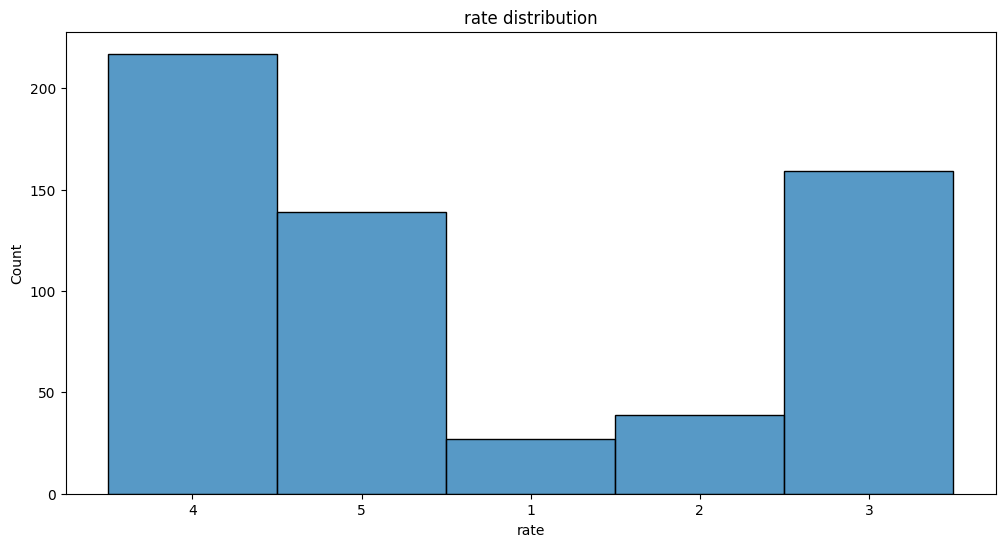

In [225]:
# 删除非数字值
data = data[data['rate'] != '未知']
# 绘制分布图
plt.figure(figsize=(12, 6))
sns.histplot(data['rate'], kde=False)
plt.title('rate distribution')
plt.show()

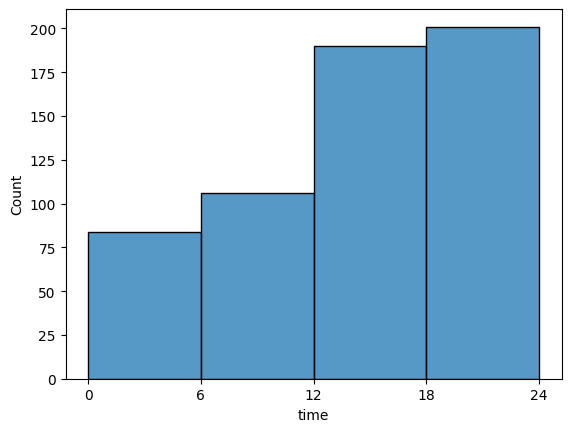

In [226]:
# 查看一天中评论分布情况
data['time'] = pd.to_datetime(data['time'])
hour = data.time.dt.hour
time_period = [0, 6, 12, 18, 24]
ax = sns.histplot(hour, bins=time_period)
ax.set_xticks(time_period)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35780 (\N{CJK UNIFIED IDEOGRAPH-8BC4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

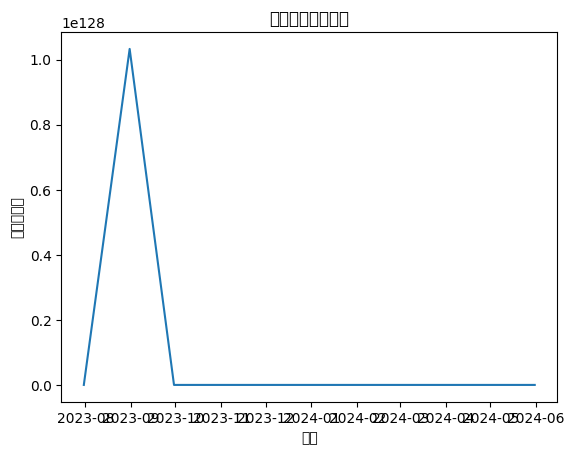

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35770 (\N{CJK UNIFIED IDEOGRAPH-8BBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


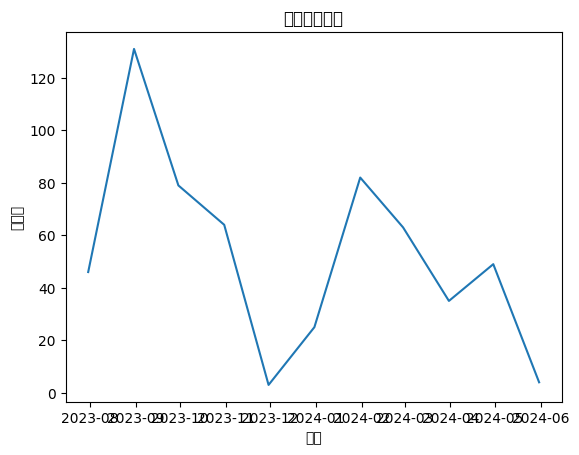

In [227]:
import pandas as pd
import matplotlib.pyplot as plt


# 将列名统一为小写（如果有必要）
data.columns = data.columns.str.lower()

# 将 'time' 列转换为日期时间类型
data['time'] = pd.to_datetime(data['time'])

# 检查是否存在 'time' 列
if 'time' in data.columns:
    # 将 'time' 列设置为索引
    data.set_index('time', inplace=True)
else:
    raise KeyError("Column 'time' does not exist in the DataFrame.")

# 将数据按月份降采样，计算评分的平均值和评论数
Rate_trend = data.resample('M').agg({'rate':'mean', 'comment':'count'})

# 绘制评分趋势图
plt.plot(Rate_trend.index, Rate_trend['rate'])
plt.xlabel('时间')
plt.ylabel('评分平均值')
plt.title('评分平均值趋势图')

# 绘制评论数趋势图
plt.figure()
plt.plot(Rate_trend.index, Rate_trend['comment'])
plt.xlabel('时间')
plt.ylabel('评论数')
plt.title('评论数趋势图')

# 显示图形
plt.show()

In [228]:
#Rate_trend数据
Rate_trend

,rate,comment
time,,
2023-07-31,120770314009661806108369977691415056629104640.0,46
2023-08-31,1033239193469805742821176493439193517193849251...,131
2023-09-30,1814346007004499433463005679916521356941345862...,79
2023-10-31,6772569617725522443834886573308032357607563914...,64
2023-11-30,151.333333,3
2023-12-31,217261737693417402531840.0,25
2024-01-31,5067746749334442494396009970817610627757861544...,82
2024-02-29,5149738798941959681835052294248169876455463264...,63
2024-03-31,412643838440697844447950615347200.0,35


In [230]:
import pandas as pd

data = pd.read_csv('长相思豆瓣.csv')

# 按 'favor' 列降序排序
sorted_data = data.sort_values(by='favor', ascending=False)

# 删除重复的 'comment'
data_without_duplicates = sorted_data.drop_duplicates(subset='comment')

# 选择前十条记录
top_10_comments = data_without_duplicates.head(10)

# 打印前十条评论
print(top_10_comments['comment'])

2                     没什么特别能说的了，也找不到能评价的话了，谢谢檀健次演了相柳，谢谢。
5                  说出我一直都是一个人的小六好让人心疼，她的家早就在三百年前分崩离析了555
18     高端的cp往往只需要简单的互动，小六下意识拥抱，十七先是震惊然后默默回味的纯情反应，老司机已...
173                                      小说成精！感谢紫姐！感谢剧组！
259        神医玟小六真的很灵动可爱，“久婚不孕我包治，药到病除送子来”这句能成为该剧经典台词天花板。
6                              真的很还原原著啊！张晚意演的玱玹，眼神戏真的很绝！
140                                  太爱九命相柳了檀健次演技好好！我好爱！
60     看之前：杨紫怎么又演这种千篇一律的仙侠。。看之后：妈呀这次不一样不一样啊。。。夭柳磕到哭死啊...
287                                  终于有个能看下去的仙侠剧了，谁懂啊！！
54     看完4集来评，我只能说剧情挺还原的，跟书里的剧情基本一毛一样，整体还行吧，看的出这部S+确实...
Name: comment, dtype: object
